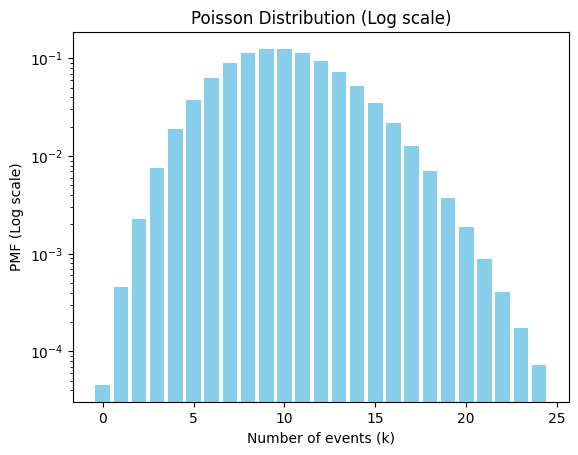

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters for the Poisson distribution
lambda_param = 10 # Example lambda value

# Generate some data
data = np.arange(0, 25)  # Discrete range of x-values
pmf_data = poisson.pmf(data, lambda_param)  # Poisson PMF values

# Create a bar plot on a log scale
plt.bar(data, pmf_data, color='skyblue')

# Set the y-axis to a log scale
plt.yscale('log')

plt.title('Poisson Distribution (Log scale)')
plt.xlabel('Number of events (k)')
plt.ylabel('PMF (Log scale)')
plt.show()
